<a href="https://colab.research.google.com/github/BKHV/risk_models/blob/master/LGD%20competition%20baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Бэйзлайн по разработке LGD модели
Loss given default (LGD) объем активов Банка, который будет утерян в случае дефолта клиента, вычисляется как доля от задолженности на момент дефолта. Для задания подготовлен ситнетический набор данных

### Импортируем библиотеки

In [56]:
import pandas as pd
import numpy as np
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from math import log
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

### Подгружаем данные

In [57]:
!wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/LGD-data-train.csv
!wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/LGD-data-test.csv

--2021-03-10 17:57:05--  https://raw.githubusercontent.com/BKHV/risk_models/master/data/LGD-data-train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 411712 (402K) [text/plain]
Saving to: ‘LGD-data-train.csv’

LGD-data-train.csv  100%[===================>] 402.06K  --.-KB/s    in 0.03s   

2021-03-10 17:57:05 (14.2 MB/s) - ‘LGD-data-train.csv’ saved [411712/411712]

--2021-03-10 17:57:05--  https://raw.githubusercontent.com/BKHV/risk_models/master/data/LGD-data-test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 152321 (

In [58]:
train_df = pd.read_csv('LGD-data-train.csv', sep=';')
test_df = pd.read_csv('LGD-data-test.csv', sep=';')

In [59]:
train_df.head()

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,ar_other_profit_and_losses,ar_net_profit,ab_immobilized_assets,ab_mobile_current_assets,ab_inventory,ab_accounts_receivable,ab_other_current_assets,ab_cash_and_securities,ab_losses,ab_own_capital,ab_borrowed_capital,ab_long_term_liabilities,ab_short_term_borrowing,ab_accounts_payable,ab_other_borrowings,bus_age,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg,pledge,LGD
0,188,44755000.0,42665000.0,42665000.0,0.0,0.0,2090000.0,-405000.0,1685000.0,2000.0,0.0,1683000.0,0.0,21561000.0,3252000.0,18309000.0,0.0,15000.0,1683000.0,15061000.0,8199000.0,0.0,2813000.0,5386000.0,0.0,177,142,1,1,1,[1-100],10000.0,1,0,0,0,Подъезд к пСатис от автомобильной дороги Выкса...,1.077790
1,213,23179000.0,22064000.0,22064000.0,0.0,0.0,1115000.0,115000.0,1230000.0,265000.0,0.0,965000.0,0.0,6440000.0,4556000.0,1884000.0,0.0,58000.0,965000.0,1224000.0,5274000.0,0.0,1798000.0,3476000.0,0.0,36,36,23,23,23,[1-100],10000.0,1,0,0,0,здание (вспомогательное строение №8),1.048031
2,578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,10,9,9,9,[1-100],10000.0,1,0,0,0,Автомобильная дорога 22 ОП МЗ 22Н-4116,0.392984
3,743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,37,6,6,6,[1-100],10000.0,1,0,0,0,автомобиль,0.834822
4,815,7190000.0,6857000.0,6857000.0,0.0,0.0,333000.0,0.0,333000.0,0.0,0.0,333000.0,0.0,352000.0,352000.0,0.0,0.0,23000.0,333000.0,343000.0,32000.0,0.0,0.0,32000.0,0.0,39,39,2,2,2,[1-100],11000.0,1,0,0,0,Автомобильная дорога 22 ОП МЗ 22Н-2210,0.013493


In [60]:
test_df.head()

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,ar_other_profit_and_losses,ar_net_profit,ab_immobilized_assets,ab_mobile_current_assets,ab_inventory,ab_accounts_receivable,ab_other_current_assets,ab_cash_and_securities,ab_losses,ab_own_capital,ab_borrowed_capital,ab_long_term_liabilities,ab_short_term_borrowing,ab_accounts_payable,ab_other_borrowings,bus_age,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg,pledge
0,188,44755000.0,42665000.0,42665000.0,0.0,0.0,2090000.0,-405000.0,1685000.0,2000.0,0.0,1683000.0,0.0,21561000.0,3252000.0,18309000.0,0.0,15000.0,1683000.0,15061000.0,8199000.0,0.0,2813000.0,5386000.0,0.0,177,142,1,1,1,[1-100],10000.0,1,0,0,0,Подъезд к пСатис от автомобильной дороги Выкса...
1,213,23179000.0,22064000.0,22064000.0,0.0,0.0,1115000.0,115000.0,1230000.0,265000.0,0.0,965000.0,0.0,6440000.0,4556000.0,1884000.0,0.0,58000.0,965000.0,1224000.0,5274000.0,0.0,1798000.0,3476000.0,0.0,36,36,23,23,23,[1-100],10000.0,1,0,0,0,здание (вспомогательное строение №8)
2,578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,10,9,9,9,[1-100],10000.0,1,0,0,0,Автомобильная дорога 22 ОП МЗ 22Н-4116
3,743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,37,6,6,6,[1-100],10000.0,1,0,0,0,автомобиль
4,815,7190000.0,6857000.0,6857000.0,0.0,0.0,333000.0,0.0,333000.0,0.0,0.0,333000.0,0.0,352000.0,352000.0,0.0,0.0,23000.0,333000.0,343000.0,32000.0,0.0,0.0,32000.0,0.0,39,39,2,2,2,[1-100],11000.0,1,0,0,0,Автомобильная дорога 22 ОП МЗ 22Н-2210


In [61]:
train_df.shape

(2091, 38)

In [62]:
test_df.shape

(822, 37)

Выборка содержит информацию по 2091 клиентам Банка. 2091 наблюдение в выборке для разработки 822 в тестовой выборке.

In [63]:
train_df['LGD'].values.mean()

0.6598314748923959

Среднее значение LGD в выборке 65,98%

### График распределения фактического LGD

No handles with labels found to put in legend.


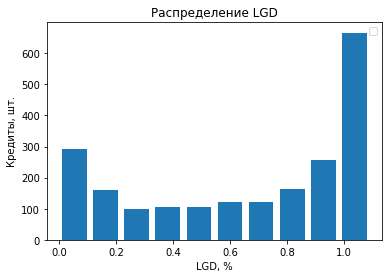

In [64]:
import matplotlib.pyplot as plt
# bins = [0,10,20,30,40,50,60,70,80,90,100]
plt.hist(train_df['LGD'].values, histtype='bar', rwidth=0.8)
plt.xlabel('LGD, %')
plt.ylabel('Кредиты, шт.')
plt.title('Распределение LGD')
plt.legend()
plt.show()

Задача прогнозирования LGD - это задача регресии. Поэтому в качестве бейзлайна используем линейную регрессиию для предсказания.

Факторы возьмем экспертно, как те, которые потенциально должны оказывать влияние на LGD

In [65]:
features = ['bus_age','ul_capital_sum', 'ul_founders_cnt']

In [66]:
l_r = LinearRegression()

In [67]:
l_r.fit(train_df[features], train_df['LGD'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Метрика MAE
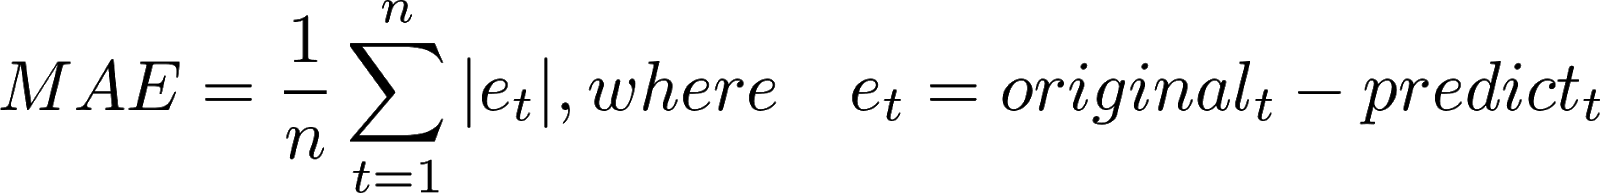


In [68]:
mean_absolute_error(train_df['LGD'], l_r.predict(train_df[features]))

0.3340654134453271

No handles with labels found to put in legend.


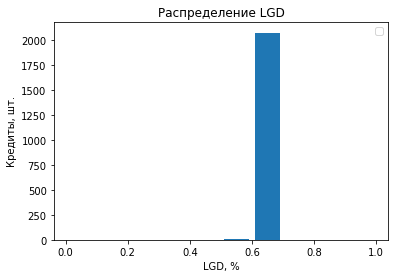

In [69]:
import matplotlib.pyplot as plt
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
plt.hist(l_r.predict(train_df[features]), bins=bins, histtype='bar', rwidth=0.8)
plt.xlabel('LGD, %')
plt.ylabel('Кредиты, шт.')
plt.title('Распределение LGD')
plt.legend()
plt.show()

Текущая модель приблежает среднее, что неплохо для бейзлайна.

In [72]:
predictions = l_r.predict(test_df[features])

In [74]:
answ_df = test_df[['record_id']].copy()

In [75]:
answ_df['predictions'] = predictions

In [76]:
answ_df.head()

,record_id,predictions
0,188,0.650290
1,213,0.663428
2,578,0.665851
3,743,0.663335
4,815,0.663145


In [77]:
answ_df.to_csv('LGD-submit.csv', index=False)